    # Automatic Jupyter Notebook for OpenML dataset 6: letter

In [1]:
from scripts.preamble import *
did = 6
data = oml.datasets.get_dataset(did)
task, topList, strats = printTopNFlows(did, 10) 
topList 

C:\Users\Hugo\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,flow,score
0,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999796
1,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999790
2,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999789
3,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999785
4,sklearn.model_selection._search.RandomizedSear...,0.999785
5,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999784
6,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999778
7,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999777
8,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999777
9,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999774


In [2]:
from scripts.problemType import *
problemType = findProblemType(data) 
checkTask(task, problemType, data.default_target_attribute) 

Problem type: supervised classification problem.
Using correct task


Complexity threshold to determine if an algorithm will be run.


In [3]:
comp = 50000000000000

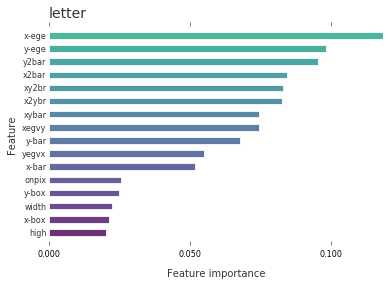

In [4]:
from scripts.featureImportance import *
featureImportance(data) 

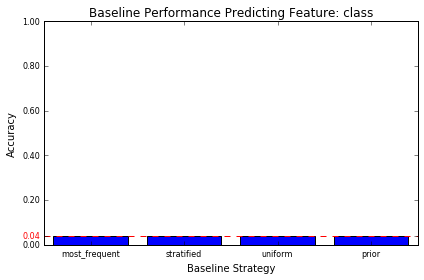

In [5]:
from scripts.baselines import *
maxBaseline = generateBaselines(data, problemType) 

Median execution time in ms: 1410.0
Mean execution time in ms: 1171244.8564494383


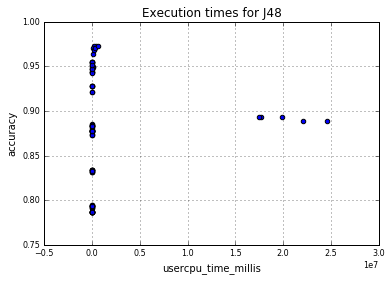

Median execution time in ms: 11220.0
Mean execution time in ms: 18327.141


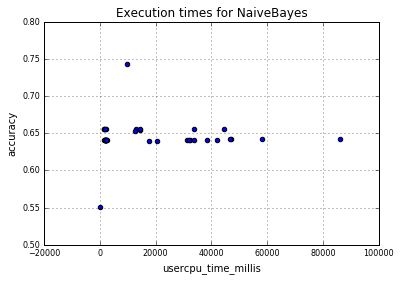

Median execution time in ms: 13130.0
Mean execution time in ms: 14556.415094339623


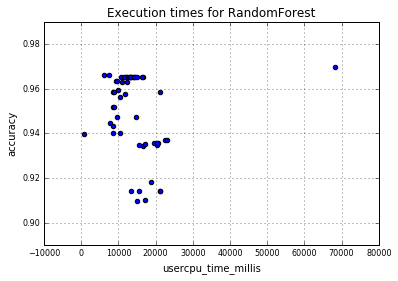

Median execution time in ms: 124160.0
Mean execution time in ms: 133140.0


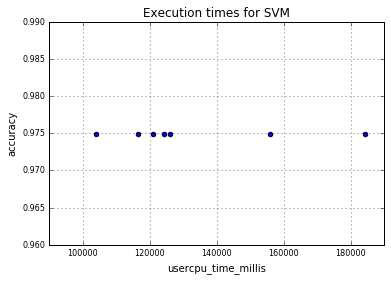

Number of folds would increase the complexity over the given threshold, number of folds has been set to: 6
Median execution time in ms: 35715.0
Mean execution time in ms: 104527.43472222221


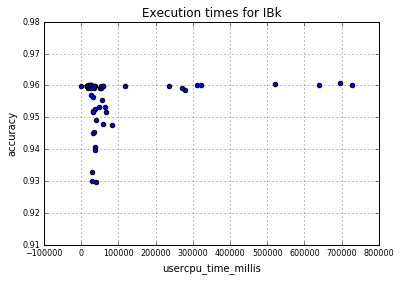

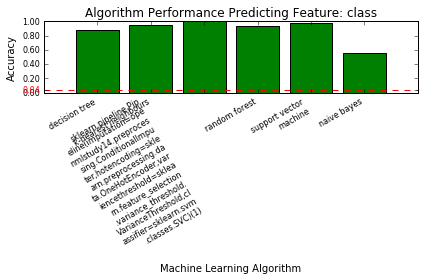

In [6]:
from scripts.machineLearningAlgorithms import *
strats = runMachineLearningAlgorithms(data, comp, strats, problemType, task, showRuntimePrediction=True, runTPOT=False)
plot_alg(data, strats, maxBaseline, problemType) 